In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_paths = [
    'data/st_louis/st_louis_0.03.jpg',
    'data/st_louis/st_louis_0.25.jpg',
    'data/st_louis/st_louis_2.5s.jpg',
    'data/st_louis/st_louis_15s.jpg',
]

exposure_times = np.array([
    0.03,
    0.25,
    2.5,
    15,
])

imgs = np.array([
    cv2.imread(img_path)[..., ::-1]
    for img_path in img_paths
])

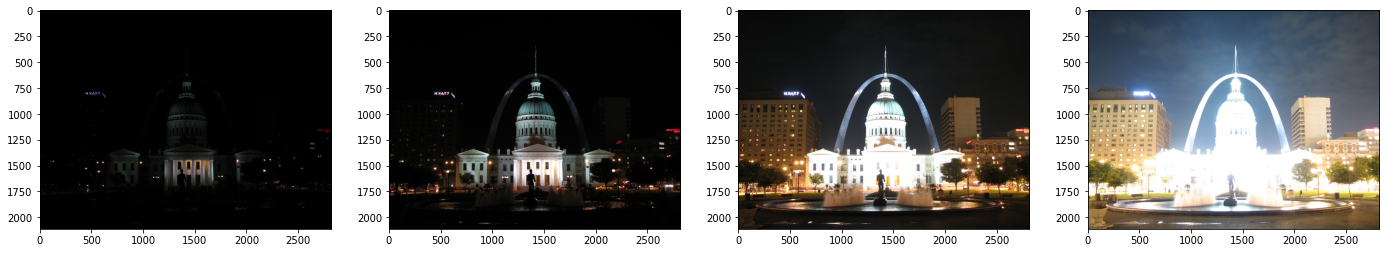

In [3]:
ncols = len(img_paths)

fig, axes = plt.subplots(ncols=ncols, figsize=(6*ncols, 6))

for img, ax in zip(imgs, axes):
    ax.imshow(img)

# Calculate radiometric response function

In [4]:
from lib.hdr_debevec import get_radiometric_response_curve

resp_curve = get_radiometric_response_curve(imgs, exposure_times)

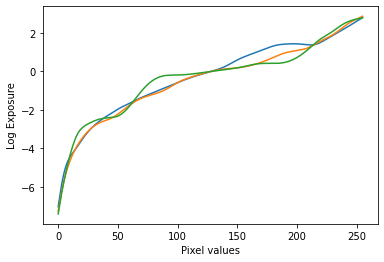

In [5]:
fig, ax = plt.subplots()

ax.set_xlabel('Pixel values')
ax.set_ylabel('Log Exposure')
ax.plot(resp_curve)

# Estimate radiance map

In [6]:
from lib.hdr_debevec import construct_radiance_map

rad_map = construct_radiance_map(imgs, resp_curve, exposure_times)

In [7]:
rad_map.dtype

dtype('float64')

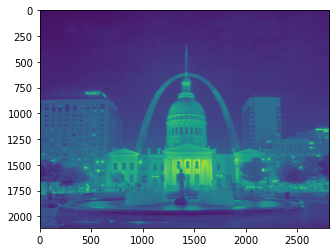

In [8]:
plt.imshow(np.log(rad_map[..., 0]))

# Tone map

For simplicity, we simply use a global gamma correction. There of course more advanced ways to perform tone mapping.

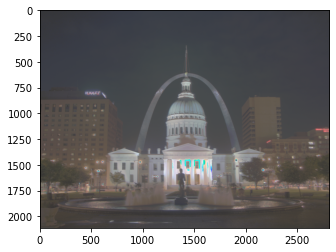

In [9]:
from lib.contrast_enhance import gamma_correct

ldr = gamma_correct(rad_map, 0.13)

plt.imshow(ldr)